In [1]:
import pytrends
import numpy as np
import pandas as pd
import requests
import lxml
import datetime
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


num = 500
pd.set_option('display.max_columns', num)
pd.set_option('display.max_rows', num)
pd.set_option('display.max_colwidth', num)


def query_entry(num_queries):

    """
    Get user input for queries
    """
    query_list = []
    
    i = 0

    for i in range(num_queries):
        query_list.append(input("Please enter keyword for query: "))
        
    return query_list



def num_of_queries():
    
    """
    Get number of queries
    """
    num = int(input("Please enter number of queries to search and compare(max 5): "))

    if num > 5 or num < 0:
        while num > 5 or num < 0:
            num = int(input("Please enter number of queries to search and compare(max 5): "))

    return num


###Custom_interest_over_time
#Build a list of search terms, a string for time and a 2-Char abreviation for location

def custom_interest_over_time(search_term, time, location):
    
    """
    Function to build payload and display results for 1 query's trend interest over time
    """
    
    num_queries = 1
    
    #time = Timeframe of interest: 
    #       now/today *number*-(H, d, m, y): for # of Hours, days, months, or years, use largest interval, 
    #       i.e. 3-m rather than 90-d
    #       OR use 'all'
 
    #location = Two letter country code for searches,  i.e. 'US' for United States, 'GB' for England, etc.
    #           leave empty for global results
    
    
    pytrend.build_payload(kw_list = search_term, timeframe = time, geo=location)
    
    interest_over_time_df = pytrend.interest_over_time()
    interest_over_time_df = interest_over_time_df.drop(['isPartial'], axis=1)
    print(interest_over_time_df)
    
    interest_over_time_df.plot()
    
    
    interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
    #Plots interest by region per state within selected timeframe
    interest_by_region_df.plot(figsize=(100, 10), kind ='bar')
    
    return

###Custom_interest_over_time end


#custom_interest_over_time_multi
#Build a list of search terms, a string for time and a 2-Char abreviation for location

def custom_interest_over_time_multi(search_terms, time, location):
   
    """
    Function to build payload and display results for multiple queries' trend interest over time
    """
    num_queries = len(search_terms)
    
    #time = Timeframe of interest: 
    #       now/today *number*-(H, d, m, y): for # of Hours, days, months, or years, use largest interval, 
    #       i.e. 3-m rather than 90-d
    #       OR use 'all'
 
    #location = Two letter country code for searches,  i.e. 'US' for United States, 'GB' for England, etc.
    #           leave empty for global results
    
    #search_terms = list of 5 terms max
    
    pytrend.build_payload(kw_list = search_terms, timeframe = time, geo=location)
    
    interest_over_time_df = pytrend.interest_over_time()
    interest_over_time_df = interest_over_time_df.drop(['isPartial'], axis=1)
    interest_over_time_df.plot()
    print(interest_over_time_df)
    
    interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)

    #Plots interest by region per state within selected timeframe
    interest_by_region_df.plot(figsize=(100, 10), kind ='bar')
    
    return

###Custom_interest_over_time multi term end



###Custom_related_searches
#Build a list of search terms, a string for time and a 2-Char abreviation for location

def custom_related_searches(search_terms, time, location):
    
    """
    Function to build payload and display results for Related Queries, returns a dictionary of dataframes
    """
    
    #time = Timeframe of interest: 
    #       now/today *number*-(H, d, m, y): for # of Hours, days, months, or years, use largest interval, 
    #       i.e. 3-m rather than 90-d
    #       OR use 'all'
 
    #location = Two letter country code for searches,  i.e. 'US' for United States, 'GB' for England, etc.
    #           leave empty for global results
    
    #search_terms = list of 5 terms max
    
    i = 0
    column_names = []
    related_list = []
    frames_master = pd.DataFrame(related_list)
    pytrend.build_payload(kw_list = search_terms, timeframe = time, geo=location)   
    
    num_queries = len(search_terms)
    # Uses the keyword to find trending searches over preset time period
    related_queries_dict = pytrend.related_queries()
    
    for i in range(num_queries):
        #Top List maxes out at 100
        related_top = pd.DataFrame(related_queries_dict[search_terms[i]]['top'])
        #Rising List is a percentage increase in searches over preset time period
        related_rising = pd.DataFrame(related_queries_dict[search_terms[i]]['rising'])
    
        # adding values to results list for top and rising results
        related_list.append(related_top)
        related_list.append(related_rising)
        frames_master = pd.concat(related_list, axis=1)
    
        #Customizing column names for readability
        if (time[0] == 't'):
            column_names.append(search_terms[i] + ' top searches over past' + time[5:10])
            column_names.append('rank')
            column_names.append(search_terms[i] + ' rising searches over past' + time[5:10])
            column_names.append('percent increase')
        elif (time[0] == 'n'):
            column_names.append(search_terms[i] + ' top searches over past' + time[3:])
            column_names.append('rank')
            column_names.append(search_terms[i] + ' rising searches over past' + time[3:])
            column_names.append('percent increase')
        elif (time[0] == '2'):
            column_names.append(search_terms[i] + ' top searches from ' + time[0:10] + ' to ' + time[11:])
            column_names.append('rank')
            column_names.append(search_terms[i] + ' rising searches from ' + time[0:10] + ' to ' + time[11:])
            column_names.append('percent increase')
        else:
            column_names.append(search_terms[i] + ' top searches since 2004')
            column_names.append('rank')
            column_names.append(search_terms[i] + ' rising searches since 2004')
            column_names.append('percent increase')

    frames_master.columns = column_names
    frames_master
    
    return frames_master

###Custom_related_searches end


#Opens google trends request service
from pytrends.request import TrendReq

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(hl='en-US', tz=360, retries=10, backoff_factor=0.5)




### API testing

            Tesla
date             
2004-01-01      6
2004-02-01      7
2004-03-01      7
2004-04-01      7
2004-05-01      6
2004-06-01      6
2004-07-01      5
2004-08-01      5
2004-09-01      5
2004-10-01      6
2004-11-01      5
2004-12-01      5
2005-01-01      6
2005-02-01      6
2005-03-01      5
2005-04-01      5
2005-05-01      5
2005-06-01      5
2005-07-01      5
2005-08-01      5
2005-09-01      5
2005-10-01      5
2005-11-01      5
2005-12-01      5
2006-01-01      5
2006-02-01      6
2006-03-01      5
2006-04-01      5
2006-05-01      5
2006-06-01      5
2006-07-01      9
2006-08-01      8
2006-09-01      6
2006-10-01      7
2006-11-01      7
2006-12-01      6
2007-01-01      7
2007-02-01      8
2007-03-01      8
2007-04-01      7
2007-05-01      8
2007-06-01      8
2007-07-01      7
2007-08-01      7
2007-09-01      6
2007-10-01      7
2007-11-01      7
2007-12-01      7
2008-01-01      8
2008-02-01      7
2008-03-01      7
2008-04-01      7
2008-05-01      9
2008-06-01

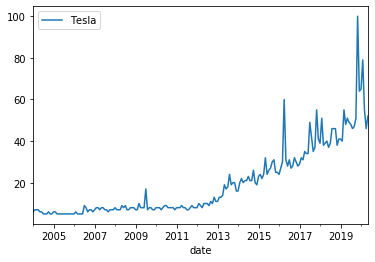

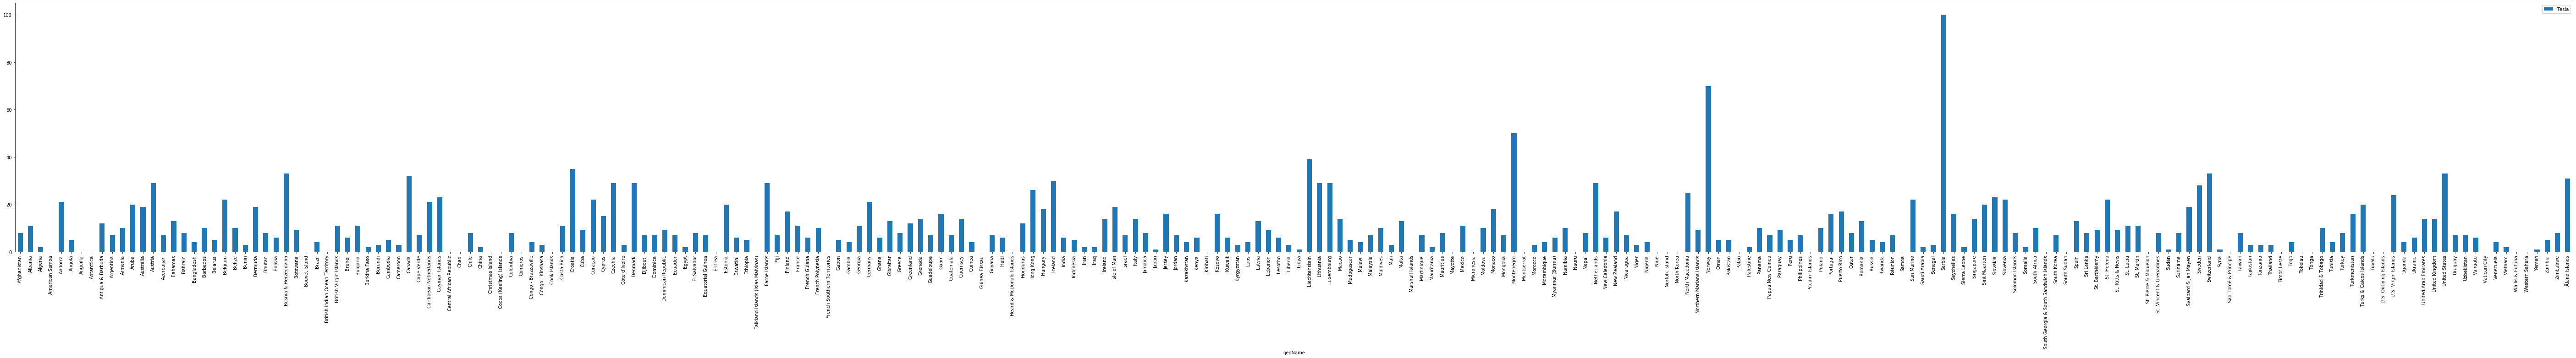

In [2]:
term1 = []
term1.append('Tesla')
time1 = 'all'

geo_cust1 = ''

custom_interest_over_time(term1, time1, geo_cust1)

            Joe Biden  Bernie Sanders  Elizabeth Warren
date                                                   
2019-06-02          6               4                 5
2019-06-09          7               5                 5
2019-06-16          8               5                 6
2019-06-23         17              16                15
2019-06-30          8               7                 5
2019-07-07          5               5                 4
2019-07-14          4               5                 4
2019-07-21          3               6                 4
2019-07-28         12              13                11
2019-08-04         10              10                 6
2019-08-11          6               8                 5
2019-08-18          5               8                 7
2019-08-25          6               7                 7
2019-09-01          7               7                 5
2019-09-08         11              11                11
2019-09-15          8               7           

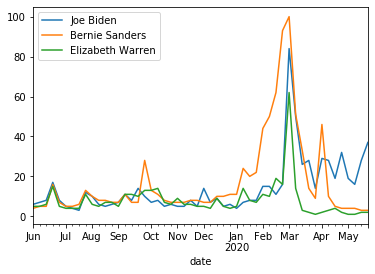

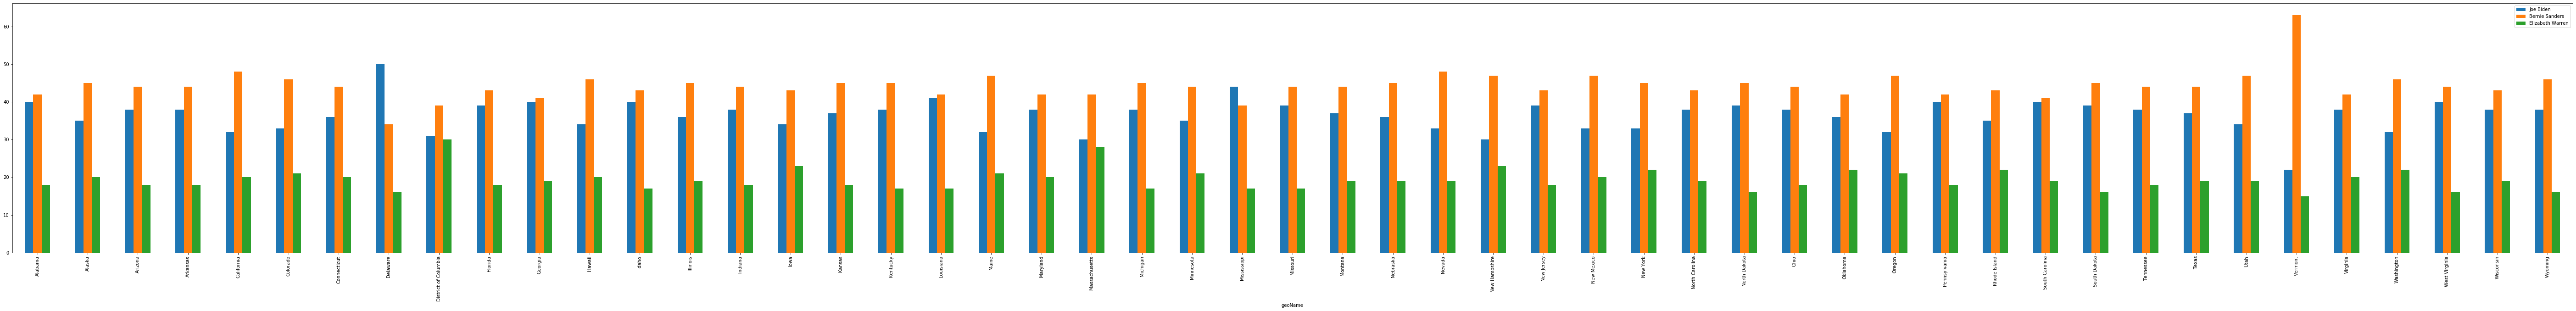

In [3]:
term2 = []
term2.append('Joe Biden')
term2.append('Bernie Sanders')
term2.append('Elizabeth Warren')
time2 = 'today 12-m'

geo_cust2 = 'US'

custom_interest_over_time_multi(term2, time2, geo_cust2)

In [4]:
term3 = []
term3.append('London')
term3.append('Liverpool')
term3.append('Manchester')
time3 = '2018-12-31 2020-05-01'

geo_cust3 = 'US'

related_terms = custom_related_searches(term3, time3, geo_cust3)
related_terms

London top searches from 2018-12-31 to 2020-05-01  rank  \
0                                         the london   100   
1                                        london time    76   
2                                         new london    68   
3                                      london lauren    56   
4                                     time in london    41   
5                                          london ky    26   
6                                  flights to london    25   
7                                            england    24   
8                                     london england    24   
9                                     london weather    24   
10                                      london broil    21   
11                                     london bridge    17   
12                                  flight to london    17   
13                               what time in london    14   
14                                      london house    14   
15                                        london map    14   
16                                     new london ct    13   
17                                       jack london    13   
18                                     london hotels    13   
19                            what time is in london    13   
20                                   london to paris    12   
21                                        london fog    12   
22                                    london airport    12   
23                            what time is it london    11   
24                                     nipsey hussle    11   

   London rising searches from 2018-12-31 to 2020-05-01  percent increase  \
0                                    coronavirus london             52800   
1                      i met a man on the london bridge              6250   
2                             kodak black lauren london              5850   
3                          lauren london net worth 2019              3700   
4                                         summer walker              3350   
5                                            oli london              3050   
6                                 meet me at the london              2500   
7                                lauren london pregnant              2350   
8               i met a man in the london bridge riddle              2150   
9                                  london marathon 2020              1950   
10                                    london boy lyrics              1550   
11                                   nipsey hussle kids              1100   
12                          lauren london nipsey hussle              1050   
13                                        nipsey hussle              1000   
14                                 london bridge attack               950   
15                                     angel has fallen               900   
16                                lauren london parents               700   
17                                    london series mlb               650   
18                                      gangs of london               550   
19                                     lauren london ig               550   
20                                        london lauren               450   
21                      nipsey hussle and lauren london               450   
22                             london pound cake strain               450   
23                              lauren london instagram               400   
24                                   lauren london kids               300   

   Liverpool top searches from 2018-12-31 to 2020-05-01  rank  \
0                                          liverpool vs   100   
1                                          liverpool fc    61   
2                                        liverpool city    27   
3                                             barcelona    25   
4                                   barcelona liverpool    24 